In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# train = pd.read_csv('../input/digit-recognizer/train.csv')
# test = pd.read_csv('../input/digit-recognizer/test.csv')

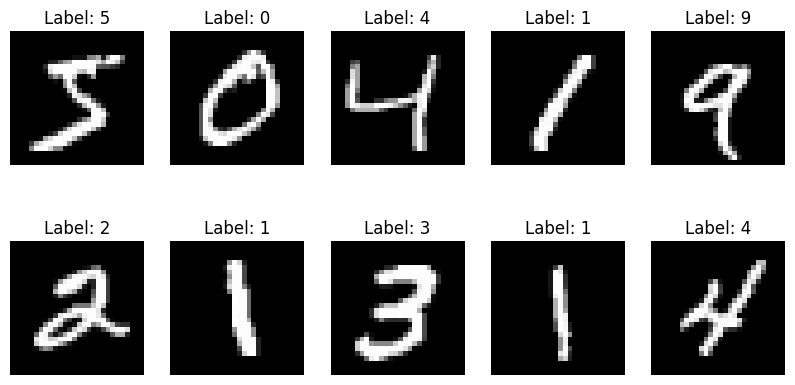

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [5]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



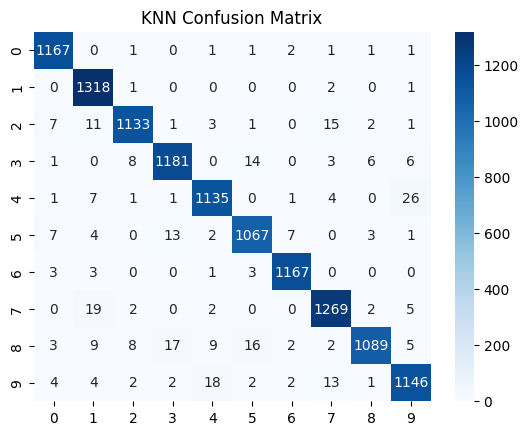

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



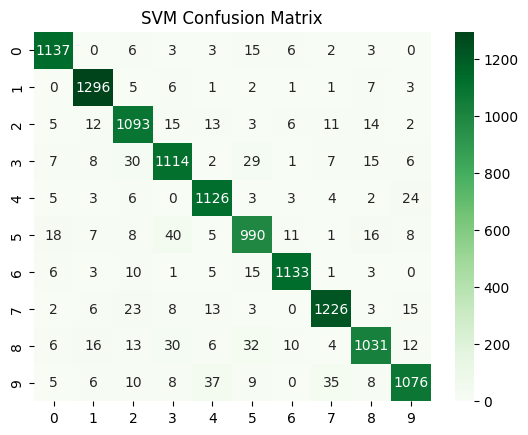

In [7]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [8]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


In [8]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

In [9]:
print(classification_report(y_val, y_val_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_split, y_train_split)

y_val_pred_lr = lr.predict(X_val)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'Logistic Regression Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Validation Accuracy: 0.9222
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.90      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.90      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_split, y_train_split)

y_val_pred_rf = rf.predict(X_val)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Classifier Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))

Random Forest Classifier Validation Accuracy: 0.9683
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.98      0.99      0.98      1322
           2       0.95      0.97      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.96      0.97      0.96      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.98      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val)

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_pca, y_train_split)

y_val_pred_knn = knn_model.predict(X_val_pca)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))

KNN Validation Accuracy: 0.9751
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.97      1.00      0.98      1322
           2       0.97      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.98      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.98      0.95      0.97      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.97      0.97     12000
weighted avg       0.98      0.98      0.98     12000



In [14]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train_split)

y_val_pred_svm = svm_model.predict(X_val_pca)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9409
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.94      0.93      1174
           3       0.92      0.92      0.92      1219
           4       0.93      0.96      0.94      1176
           5       0.92      0.90      0.91      1104
           6       0.97      0.97      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.93      0.90      0.91      1160
           9       0.94      0.91      0.93      1194

    accuracy                           0.94     12000
   macro avg       0.94      0.94      0.94     12000
weighted avg       0.94      0.94      0.94     12000



In [15]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_pca, y_train_split)

y_val_pred_svm = svm_model.predict(X_val_pca)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))

SVM Validation Accuracy: 0.9826
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.97      0.99      0.98      1174
           3       0.99      0.97      0.98      1219
           4       0.97      0.99      0.98      1176
           5       0.98      0.98      0.98      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.98      0.98      1299
           8       0.97      0.98      0.98      1160
           9       0.98      0.97      0.98      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train_split)

y_val_pred_dt = dt.predict(X_val_pca)

dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')

print(classification_report(y_val, y_val_pred_dt))

Decision Tree Validation Accuracy: 0.8304
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1175
           1       0.95      0.96      0.95      1322
           2       0.83      0.83      0.83      1174
           3       0.80      0.78      0.79      1219
           4       0.78      0.80      0.79      1176
           5       0.75      0.76      0.76      1104
           6       0.89      0.89      0.89      1177
           7       0.87      0.85      0.86      1299
           8       0.77      0.75      0.76      1160
           9       0.74      0.77      0.75      1194

    accuracy                           0.83     12000
   macro avg       0.83      0.83      0.83     12000
weighted avg       0.83      0.83      0.83     12000



In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_split)

y_val_pred_lr = lr.predict(X_val_pca)

lr_acc = accuracy_score(y_val, y_val_pred_lr)
print(f'Logistic Regression Validation Accuracy: {lr_acc:.4f}')

print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Validation Accuracy: 0.9203
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.89      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.92      0.94      0.93      1176
           5       0.89      0.87      0.88      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.89      0.88      0.88      1160
           9       0.90      0.90      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train_split)

y_val_pred_rf = rf.predict(X_val_pca)

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Classifier Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))

Random Forest Classifier Validation Accuracy: 0.9487
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1175
           1       0.98      0.98      0.98      1322
           2       0.94      0.95      0.95      1174
           3       0.93      0.93      0.93      1219
           4       0.93      0.95      0.94      1176
           5       0.93      0.93      0.93      1104
           6       0.97      0.98      0.97      1177
           7       0.96      0.96      0.96      1299
           8       0.94      0.91      0.92      1160
           9       0.94      0.92      0.93      1194

    accuracy                           0.95     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.95      0.95      0.95     12000



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Reduced parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],                    # Removed 'elasticnet' and 'None' for simplicity
    'C': [0.1, 1, 10],                          # Focused on fewer, impactful values
    'solver': ['liblinear'],                    # 'liblinear' works well for L1/L2 penalties and smaller datasets
}

# Initialize Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=500)  # Reduced max_iter for speed

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,              # Reduced cross-validation folds
    verbose=1,
    n_jobs=-1          # Parallel processing
)

# Fit GridSearchCV
grid_search.fit(X_train_pca, y_train_split)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Params:", best_params)
print("Best CV Score:", grid_search.best_score_)

# Predict and evaluate
y_pred = best_model.predict(X_val_pca)
print("Logistic Regression Test Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score: 0.9078541666666666
Logistic Regression Test Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.94      0.97      0.96      1322
           2       0.90      0.88      0.89      1174
           3       0.90      0.88      0.89      1219
           4       0.91      0.93      0.92      1176
           5       0.88      0.84      0.86      1104
           6       0.94      0.96      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.86      0.85      0.86      1160
           9       0.88      0.87      0.87      1194

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [25]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
from tensorflow.keras.utils import to_categorical

X = train.drop('label', axis=1).to_numpy()
y = train['label'].to_numpy()

X = X / 255.0

X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, 10)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape,X_test.shape,Y_train.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (33600, 10)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [30]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer to specify the input shape
    Flatten(),                 # Flatten the input
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons
])

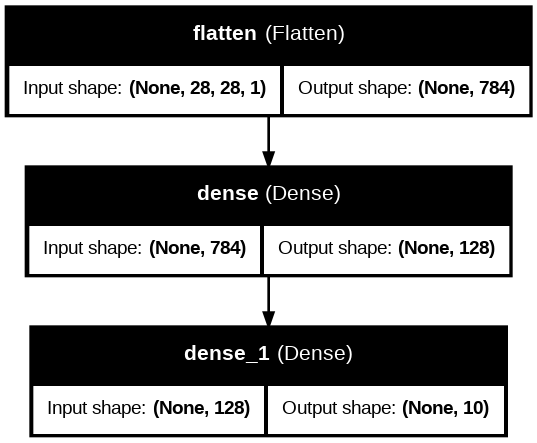

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8560 - loss: 0.5255 - val_accuracy: 0.9436 - val_loss: 0.1925
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9552 - loss: 0.1557 - val_accuracy: 0.9575 - val_loss: 0.1397
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9703 - loss: 0.0995 - val_accuracy: 0.9654 - val_loss: 0.1127
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9769 - loss: 0.0763 - val_accuracy: 0.9667 - val_loss: 0.1080
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9849 - loss: 0.0536 - val_accuracy: 0.9675 - val_loss: 0.1094
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9868 - loss: 0.0455 - val_accuracy: 0.9704 - val_loss: 0.1019
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9917 - loss: 0.0307 - val_accuracy: 0.9711 - val_loss: 0.0999
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9936 - loss: 0.0253 - 

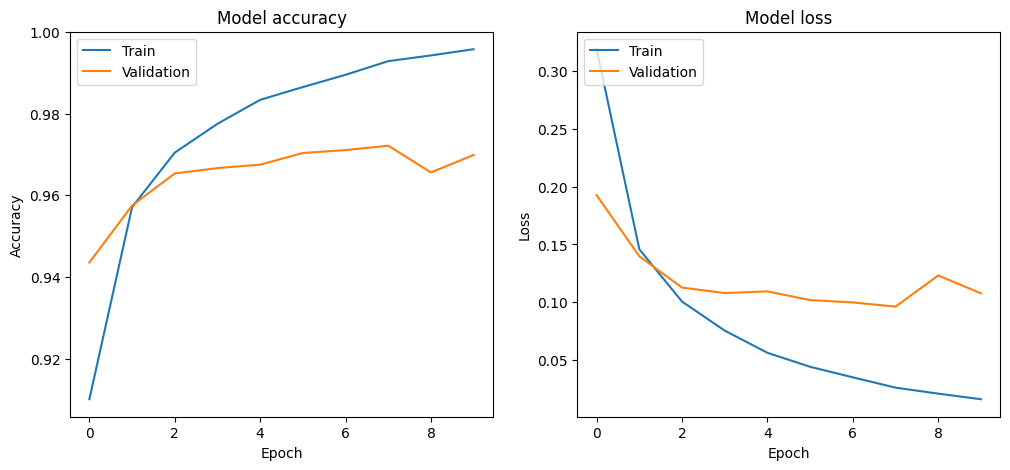

In [34]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

history_plot(history)

In [35]:
from tensorflow.keras.layers import Dropout

# Define a deeper model
model_deep = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, Y_train,
                               validation_data=(X_test, Y_test),
                               epochs=10,
                               batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8536 - loss: 0.4939 - val_accuracy: 0.9569 - val_loss: 0.1438
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9632 - loss: 0.1151 - val_accuracy: 0.9643 - val_loss: 0.1176
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9767 - loss: 0.0712 - val_accuracy: 0.9707 - val_loss: 0.0966
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9841 - loss: 0.0503 - val_accuracy: 0.9665 - val_loss: 0.1138
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9853 - loss: 0.0421 - val_accuracy: 0.9706 - val_loss: 0.1095
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9905 - loss: 0.0312 - val_accuracy: 0.9698 - val_loss: 0.1219
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.9705 - val_loss: 0.1142
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9921 - loss: 0.0242

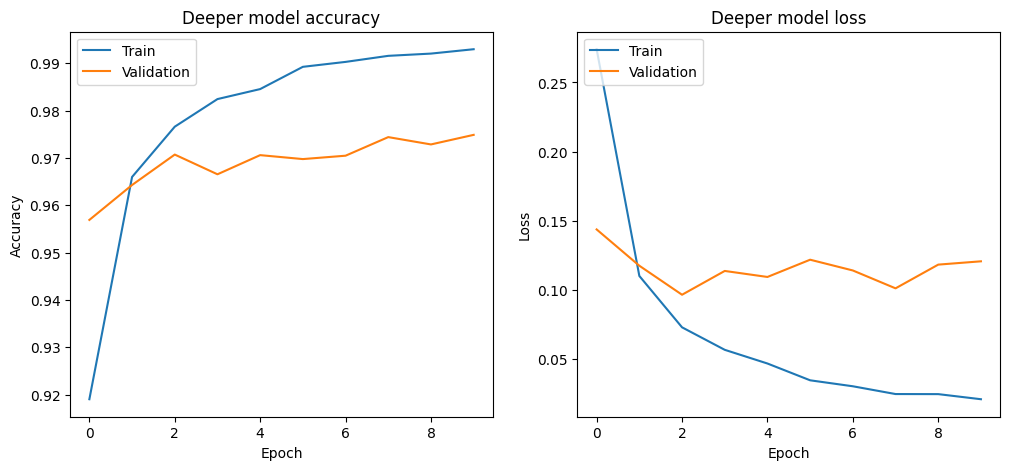

In [36]:
history_plot(history_deep, model_name='Deeper model')


In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a model with convolutional layers
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                              # Output layer
])


model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
history_conv = model_conv.fit(X_train, Y_train,
                              validation_data=(X_test, Y_test),
                              epochs=10,
                              batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.8697 - loss: 0.4290 - val_accuracy: 0.9776 - val_loss: 0.0712
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9814 - loss: 0.0588 - val_accuracy: 0.9810 - val_loss: 0.0647
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9882 - loss: 0.0360 - val_accuracy: 0.9864 - val_loss: 0.0463
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.9917 - loss: 0.0272 - val_accuracy: 0.9855 - val_loss: 0.0445
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9922 - loss: 0.0223 - val_accuracy: 0.9877 - val_loss: 0.0387
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9958 - loss: 0.0133 - val_accuracy: 0.9882 - val_loss: 0.0432
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9968 - loss: 0.0097 - val_accuracy: 0.9894 - val_loss: 0.0359
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9964 -

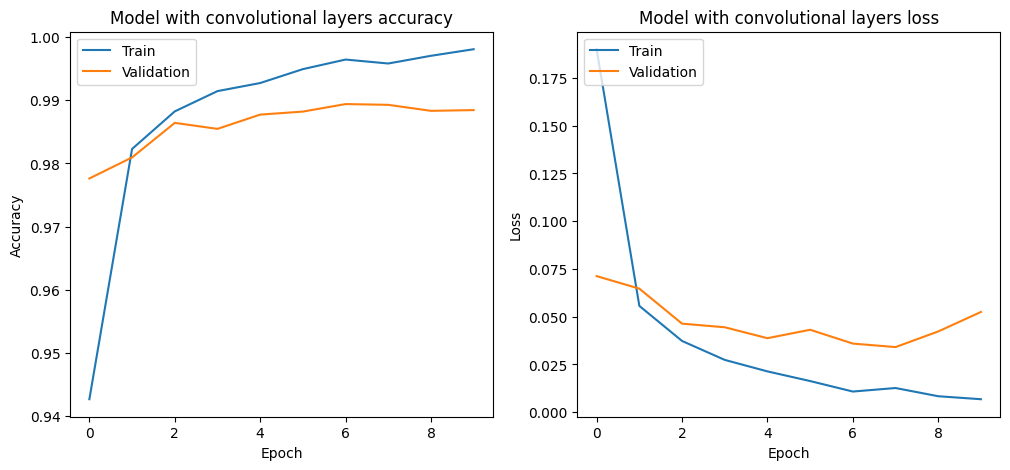

In [39]:
history_plot(history_conv, model_name='Model with convolutional layers')

In [40]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [41]:
import keras_tuner as kt

In [42]:
# Define a model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(10, activation='softmax')                                              # Output layer
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, Y_train,
                                    validation_data=(X_train, Y_train),
                                    epochs=10,
                                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - accuracy: 0.7770 - loss: 0.6778 - val_accuracy: 0.9786 - val_loss: 0.0721
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 43ms/step - accuracy: 0.9591 - loss: 0.1350 - val_accuracy: 0.9855 - val_loss: 0.0468
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9683 - loss: 0.1079 - val_accuracy: 0.9860 - val_loss: 0.0431
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9739 - loss: 0.0801 - val_accuracy: 0.9912 - val_loss: 0.0286
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9774 - loss: 0.0737 - val_accuracy: 0.9933 - val_loss: 0.0226
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9805 - loss: 0.0631 - val_accuracy: 0.9941 - val_loss: 0.0198
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9819 - loss: 0.0598 - val_accuracy: 0.9951 - val_loss: 0.0162
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9851 -

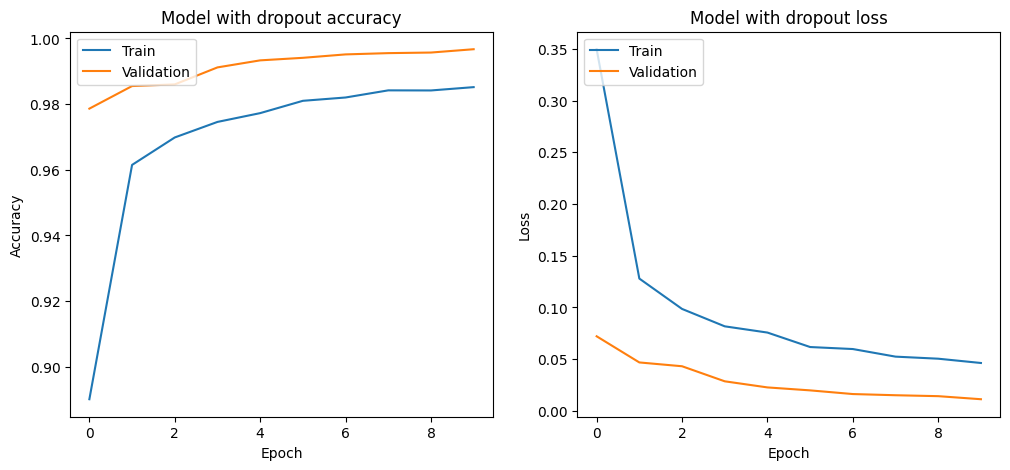

In [43]:
history_plot(history_dropout, model_name='Model with dropout')